In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/ekinox/data/student_data.csv", delimiter=",")

In [5]:
data.columns

Index(['StudentID', 'FirstName', 'FamilyName', 'school', 'sex', 'age',
       'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'FinalGrade'],
      dtype='object')

In [7]:
# Sélection des variables pertinentes pour le clustering
X = data[['Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'Walc', 'absences']]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

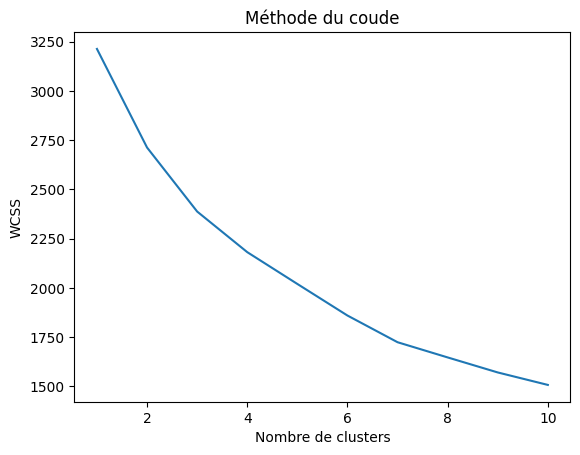

In [11]:
# Recherche du nombre optimal de clusters (méthode du coude)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Application de l'algorithme k-means avec le nombre optimal de clusters
n_clusters = 10 # À déterminer à partir de la méthode du coude
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Calcul de la complexité d'accompagner l'élève pour améliorer son niveau scolaire
data['cluster'] = labels
complexity = data.groupby('cluster').mean()['FinalGrade']

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-c35489f91793>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  complexity = data.groupby('cluster').mean()['FinalGrade']


In [14]:
complexity

cluster
0    12.135593
1    11.900000
2    11.157895
3    10.716667
4     8.076923
5    13.297872
6    12.521739
7     9.600000
8     9.400000
9    10.689655
Name: FinalGrade, dtype: float64

In [15]:
data.cluster

0      0
1      3
2      4
3      6
4      0
      ..
352    4
353    9
354    4
355    9
356    2
Name: cluster, Length: 357, dtype: int32

In [16]:
import plotly.express as px
import pandas as pd

# Création de la figure interactive
fig = px.scatter(data, x="FinalGrade", y="cluster", color="school", hover_name="FamilyName", size="absences")

# Ajout de filtres interactifs
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["color", "school"],
                    label="Ecole",
                    method="restyle"
                ),
                dict(
                    args=["color", "sex"],
                    label="Sexe",
                    method="restyle"
                ),
                dict(
                    args=["color", "Fjob"],
                    label="Travail du père",
                    method="restyle"
                )
            ]),
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

# Affichage de la figure
fig.show()